<a href="https://colab.research.google.com/github/Gupta12o/7shiftdata/blob/main/ConversionRate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [42]:
companies = pd.read_csv("https://github.com/Gupta12o/7shiftdata/blob/main/companies.csv",sep = "\t")

trails = pd.read_csv("https://github.com/Gupta12o/7shiftdata/blob/main/trials.csv",sep = "\t")

In [41]:
companies.head()

,<!DOCTYPE html>
0,"<html lang=""en"">"
1,<head>
2,"<meta charset=""utf-8"">"
3,"<link rel=""dns-prefetch"" href=""https://githu..."
4,"<link rel=""dns-prefetch"" href=""https://avata..."


In [ ]:
trails.head(20)

,Unnamed: 0,trial_date,customer_name,utm,display_price,company_id
0,0,2015-11-01,David Gross,google,11,101.0
1,1,2016-08-11,Dawn Allen,organic,9,102.0
2,2,2016-09-20,Randy Wood,google,9,103.0
3,3,2017-03-12,Michael Kemp,organic,25,104.0
4,4,2017-03-28,Emily Washington,linkedin,44,NaN
5,5,2017-03-28,Kevin Cook DDS,linkedin,31,NaN
6,6,2017-03-28,Paul Foster,email_footer,47,NaN
7,7,2017-03-28,David Scott,email_footer,42,NaN
8,8,2017-03-28,Kathleen Wilson,facebook,47,NaN
9,9,2017-03-28,Antonio Brown,email_footer,45,NaN


In [ ]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         1000 non-null   int64 
 1   company_id         1000 non-null   int64 
 2   signup_date        1000 non-null   object
 3   cancellation_date  298 non-null    object
 4   name               1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


In [ ]:
trails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     10000 non-null  int64  
 1   trial_date     10000 non-null  object 
 2   customer_name  10000 non-null  object 
 3   utm            10000 non-null  object 
 4   display_price  10000 non-null  int64  
 5   company_id     1000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 468.9+ KB


In [ ]:
comTrails=trails.dropna()

In [ ]:
comTrails

,Unnamed: 0,trial_date,customer_name,utm,display_price,company_id
0,0,2015-11-01,David Gross,google,11,101.0
1,1,2016-08-11,Dawn Allen,organic,9,102.0
2,2,2016-09-20,Randy Wood,google,9,103.0
3,3,2017-03-12,Michael Kemp,organic,25,104.0
135,135,2017-04-18,Lauren Flores,organic,19,105.0
...,...,...,...,...,...,...
9995,9995,2021-02-10,Mrs. Amy Roberts,organic,12,1096.0
9996,9996,2021-02-11,Cory Daugherty,organic,17,1097.0
9997,9997,2021-02-13,Mark Valenzuela,organic,48,1098.0
9998,9998,2021-02-15,Sharon Taylor,organic,49,1099.0


7shifts Data Analyst Exercise
Attached are 2 files: companies.csv and trials.csv. Please explore the data for approximately 30
minutes and tell me one interesting thing you find about the conversion rates. Visualizations
may be helpful but are not required.
Important information:
- This was done in .csvs for ease of use, feel free to import it into whatever database or
tools you prefer.
- Trials can be joined to companies via company_id. A trial with no company ID did not
convert.
- Conversion rate is defined as the proportion of prospective customers (trials) that made
a purchase and became actual customers (companies) within a given time period

In [ ]:
comTrails['utm'].value_counts()

organic     723
google      232
linkedin     45
Name: utm, dtype: int64

In [ ]:
trails['utm'].value_counts()

organic         2061
facebook        2044
email_footer    2026
google          1938
linkedin        1931
Name: utm, dtype: int64

In [ ]:
print(trails['display_price'].max())
print(trails['display_price'].min())

49
9


In [ ]:
trails['bins'] = pd.cut(x=trails['display_price'], bins=[9, 19, 29, 39, 49])

In [ ]:
# We can check the frequency of each bin 
print(trails['bins'].unique())

[(9.0, 19.0], NaN, (19.0, 29.0], (39.0, 49.0], (29.0, 39.0]]
Categories (4, interval[int64]): [(9, 19] < (19, 29] < (29, 39] < (39, 49]]


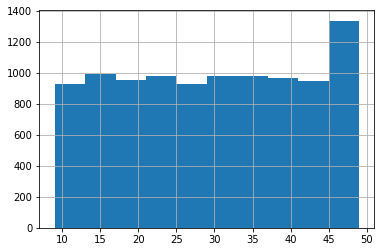

In [ ]:
trails['display_price'].hist()

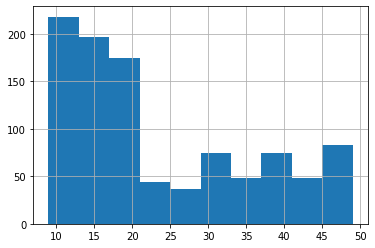

In [ ]:
comTrails['display_price'].hist()

In [ ]:
# trails['bins''].hist()

SyntaxError: ignored

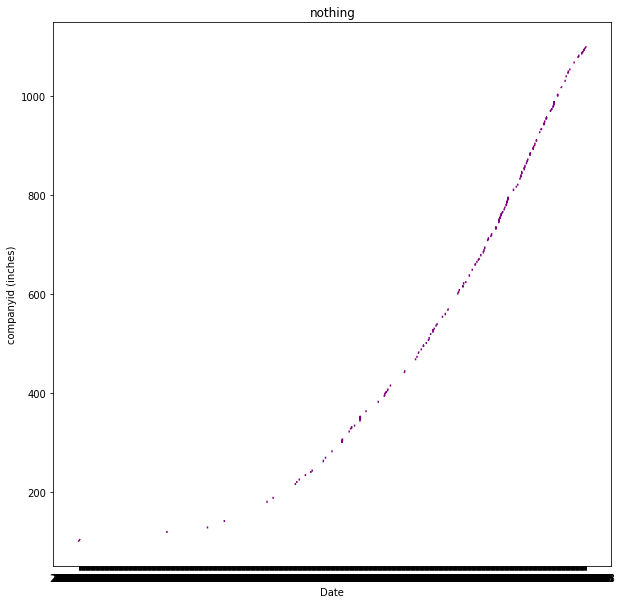

In [ ]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(trails['trial_date'],
        trails['company_id'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="companyid (inches)",
       title="nothing")

plt.show()


In [ ]:
combined = pd.merge(companies, comTrails, how="inner",on=["company_id"])

In [ ]:
combined.head(20)

,Unnamed: 0_x,company_id,signup_date,cancellation_date,name,Unnamed: 0_y,trial_date,customer_name,utm,display_price
0,0,101,2015-11-08,2019-04-02,Lee and Sons,0,2015-11-01,David Gross,google,11
1,1,102,2016-08-18,2019-05-17,"Petersen, Johnson and Caldwell",1,2016-08-11,Dawn Allen,organic,9
2,2,103,2016-09-27,2019-02-25,"Harper, Norris and Jackson",2,2016-09-20,Randy Wood,google,9
3,3,104,2017-03-19,2019-10-26,"White, Sherman and Jones",3,2017-03-12,Michael Kemp,organic,25
4,4,105,2017-04-25,2019-02-14,Allen Ltd,135,2017-04-18,Lauren Flores,organic,19
5,5,106,2017-05-28,2019-12-27,Mathis-Salinas,343,2017-05-21,Sarah Norman,organic,11
6,6,107,2017-06-02,2020-08-09,Murphy PLC,377,2017-05-26,Elizabeth Torres,organic,13
7,7,108,2017-06-12,2019-11-03,"Romero, Adams and Porter",434,2017-06-05,Dana Gordon,organic,28
8,8,109,2017-07-13,2019-07-05,"Lee, Higgins and Johnson",625,2017-07-06,Mary Allen,organic,21
9,9,110,2017-08-26,2019-04-11,"Watts, Richards and Simon",905,2017-08-19,John Parsons,organic,37


In [ ]:
combined.shape

(1000, 10)

In [ ]:
combined['utm'].value_counts()

organic     723
google      232
linkedin     45
Name: utm, dtype: int64

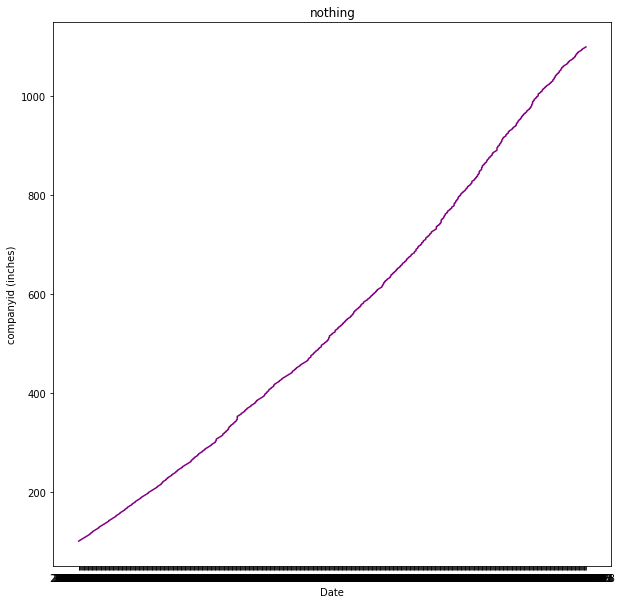

In [ ]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.plot(combined['trial_date'],
        combined['company_id'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="companyid (inches)",
       title="nothing")

plt.show()
